# Projet Scientifique Collectif sur les tir au buts au football.

Ci dessous, tous le code qui a permis l'analyse produite dans notre rapport. Le code est donné dans le même ordre que les parties du rapport. C'est pourquoi l'on commence par la partie 3. La collecte a été continuée après que ce notebook ait été exécuté pour la dernière fois, cependant il est aisé d'ajouter vos données au code si vous le souhaitez.

Ici, on a donc un total de 172 séances pour 1796 pénalties tirés.

In [495]:
# importation des librairies 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import binom

In [496]:
import sys

log_file = open("output.txt", "w")
sys.stdout = log_file




In [497]:

# sys.stdout = sys.__stdout__


# log_file.close()

### chargement des données

In [498]:
# chargement des données
euro_df = pd.read_csv('EURO.csv')
cdm_df = pd.read_csv('CDM.csv')
ucl_df = pd.read_csv('UCL.csv')
can_df = pd.read_csv('CAN.csv')
europa_df = pd.read_csv('EUROPA.csv')
copa_df = pd.read_csv('COPA.csv')
cdmc_df = pd.read_csv('CDMC.csv')
cdf_df = pd.read_csv('CDF.csv')
cl_df = pd.read_csv('CL.csv')   
gc_df = pd.read_csv('GC.csv')

## Partie 4 : Statistiques descriptives

In [499]:
print("STATISTIQUES DESCRIPTIVES : Partie 4 du raaport essentiellement"+'\n')

df = pd.concat([euro_df, cdm_df, ucl_df, can_df, europa_df, copa_df, cdmc_df, cdf_df, cl_df, gc_df]) 
df_grandes_competitions = pd.concat([euro_df, cdm_df, ucl_df])                      # on fait cela pour pouvoir séparer les analyses des grandes
df_autres_competitions = pd.concat([can_df, europa_df, copa_df, cdmc_df, cdf_df, gc_df, cl_df])   # compétitions des autres compéitions pour voir s'il existe une différence

# traitement des erreurs dans les données
# on s'assure que les données sont bien au format numérique

df['duration_sifflet'] = df['duration_sifflet'].str.replace(',', '.') # on remplace la virgule par un point 
df['duration_sifflet'] = df['duration_sifflet'].astype(float) # on convertit la colonne en float
df['duration_ball'] = df['duration_ball'].str.replace(',', '.') 
df['duration_ball'] = df['duration_ball'].astype(float) 

# Calcul du taux de réussite
success_rate = df['Goal'].mean() * 100
nb_tirs = df['Goal'].shape[0]

print(f"Taux de réussite des pénaltys : {success_rate:.2f}%")
print(f"Nombre de pénaltys tirés : {nb_tirs}")
print('\n')


In [500]:
# Pour chaque compétition, on calcule le taux de réussite et le nombre de tirs
print("taux de réussite pour chaque compétition :")
competitions = {
    "cdm": cdm_df,
    "ucl": ucl_df,
    "euro": euro_df,
    "can": can_df,
    "europa": europa_df,
    "copa": copa_df,
    "cdmc": cdmc_df,
    "cdf": cdf_df,
    "cl": cl_df,
    "gc": gc_df
}

for name, df1 in competitions.items():
    success_rate = df1['Goal'].mean() * 100
    nb_tirs = df1['Goal'].shape[0]
    print(f"Taux de réussite des pénaltys en {name} : {success_rate:.2f}% pour {nb_tirs} tirs")

print('\n')


_________________________________________________________________________________________________________________________________________________

Ci-dessous le test pour connaitre l'impact des mouvements du gardien.

In [501]:

print("test sur la mouvement des gardiens :")
# Nombre de pénaltys avec Keeper_moovs = 'Y'
count_with_moovs = df[df['Keeper_moovs'] == 'Y'].shape[0]

# Nombre de pénaltys avec Keeper_moovs = 'N' (donc sans keeper moovs)
count_without_moovs = df[df['Keeper_moovs'] == 'N'].shape[0]

# Taux de réussite avec Keeper_moovs = 'Y'
success_with_moovs = df[df['Keeper_moovs'] == 'Y']['Goal'].mean() * 100

# Taux de réussite avec Keeper_moovs = 'N' (donc sans keeper moovs)
success_without_moovs = df[df['Keeper_moovs'] == 'N']['Goal'].mean() * 100

# Affichage des résultats
print(f"Nombre de pénaltys avec Keeper_moovs : {count_with_moovs}, Taux de réussite : {success_with_moovs:.2f}%")
print(f"Nombre de pénaltys sans Keeper_moovs : {count_without_moovs}, Taux de réussite : {success_without_moovs:.2f}%")

n = 293
p = 0.7428

X = binom(n, p)

p_less = X.cdf(0.6519*274)
p_less = p_less*100

print(f"p-valeur du test 'H_0 = les mouvements du gardien n'ont pas d'impact' contre 'H_1 = ils ont un impact' : {p_less:.2f}")
print("\n")

La p-valeur est assez basse pour rejeter $H_0$ on déduit que les mouvements du gardien ont un impact.

_________________________________________________________________________________________________________________________________________________

Ci dessous, on cherche à voir quand est ce que les gardiens se sont mis à gêner les joueurs.

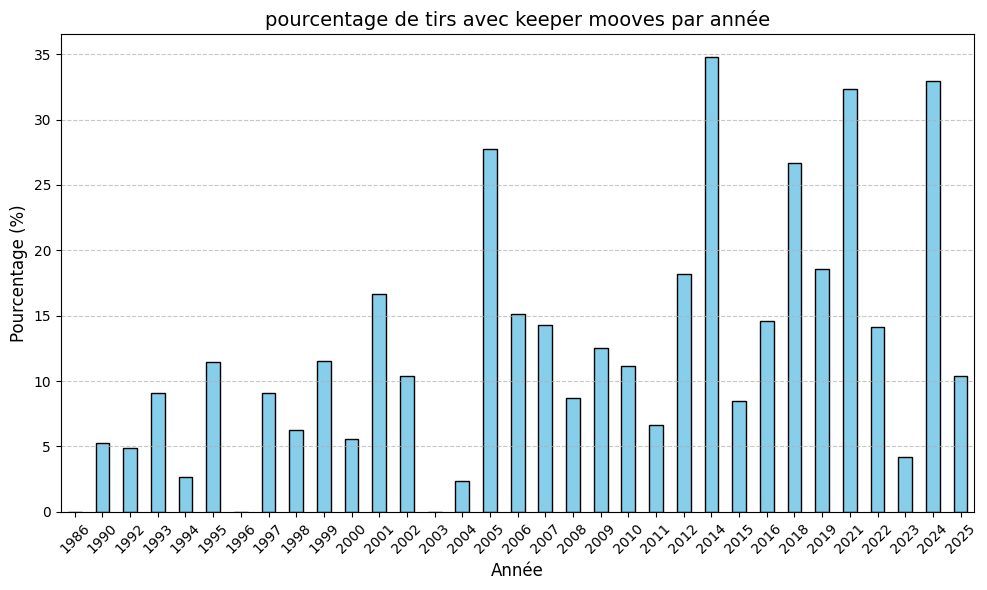

In [502]:

# Filtrer les pénaltys avec Keeper_moovs = 'Y'
df = df.dropna(subset=['Year'])  
df['Year'] = df['Year'].astype(int)  

# Calculer le nombre de tirs avec Keeper_moovs par année en divisant par le nombre total de tirs durant l'année
moovs_per_year = df[df['Keeper_moovs'] == 'Y'].groupby('Year').size()
total_per_year = df.groupby('Year').size()
moovs_per_year = moovs_per_year / total_per_year *100


# Création du graphique
plt.figure(figsize=(10, 6))
moovs_per_year.plot(kind='bar', color='skyblue', edgecolor='black')

# Personnalisation du graphique
plt.title("pourcentage de tirs avec keeper mooves par année", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Pourcentage (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("pourcentage_tirs_keeper_moovs.png", dpi=300)  # Enregistrement de la figure
# Affichage
plt.show()

In [503]:
# Ci dessous, le code regarde si le taux de réussite a changé au fil des années

# Définir les périodes
periods = {
    "1990-1999": (1990, 1999),
    "2000-2009": (2000, 2009),
    "2010-2019": (2010, 2019),
    "2020-2029": (2020, 2029),
}

# Initialisation des résultats
success_rates = {}

# Calcul du nombre de penalties pour chauqe période
penalties_per_period = {period: df[(df['Year'] >= start) & (df['Year'] <= end)].shape[0] for period, (start, end) in periods.items()}
print("Nombre de pénaltys par période :")
for period, count in penalties_per_period.items():
    print(f"Période {period} : {count} pénaltys")
print('\n')

# Calcul du taux de réussite pour chaque période
for period, (start, end) in periods.items():
    subset = df[(df['Year'] >= start) & (df['Year'] <= end)]
    success_rate = subset['Goal'].mean() * 100  # Taux de réussite
    success_rates[period] = success_rate

# Affichage des résultats
print("taux de réussite par période :")
for period, rate in success_rates.items():
    print(f"Période {period} : Taux de réussite = {rate:.2f}%")
print('\n')


_________________________________________________________________________________________________________________________________________________

Ci dessous nous nous intéressons au différence de réussite en fonction du temps mis avant de tirer.

In [504]:

df = pd.concat([euro_df, cdm_df, ucl_df, can_df, europa_df, copa_df, cdmc_df, cdf_df, cl_df, gc_df]) 

df['duration_sifflet'] = df['duration_sifflet'].astype(str) # on convertit la colonne en str
df['duration_sifflet'] = df['duration_sifflet'].str.replace(',', '.') # on remplace la virgule par un point 
df['duration_sifflet'] = df['duration_sifflet'].astype(float) # on convertit la colonne en float

# drop les colonnes qui ont un duration_sifflet de 0
df = df[df['duration_sifflet'] != 0]


/var/folders/1p/1m8pwlhx1fl13sl23s4fqslw0000gn/T/ipykernel_7403/977944586.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_rate_by_time = df.groupby('time_range')['Goal'].mean() * 100
/var/folders/1p/1m8pwlhx1fl13sl23s4fqslw0000gn/T/ipykernel_7403/977944586.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tirs_per_time_range = df.groupby('time_range').size()


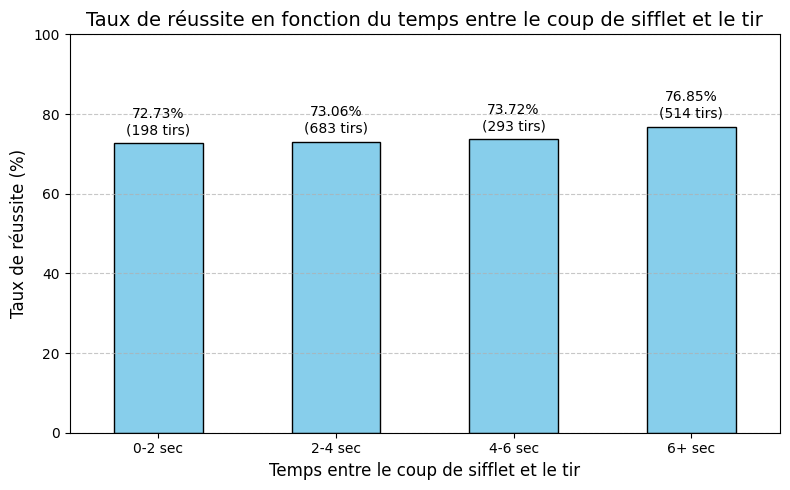

In [505]:
# Définir les tranches de temps
bins = [0,2, 4, 6, float('inf')]
labels = ['0-2 sec','2-4 sec',  '4-6 sec', '6+ sec']

# Créer une nouvelle colonne pour les tranches
df['time_range'] = pd.cut(df['duration_sifflet'], bins=bins, labels=labels, right=False)

# Calculer le taux de réussite pour chaque tranche
success_rate_by_time = df.groupby('time_range')['Goal'].mean() * 100

# Créer le graphique
plt.figure(figsize=(8, 5))
success_rate_by_time.plot(kind='bar', color='skyblue', edgecolor='black')

# nombre de tirs pour chaque tranche de temps
df['time_range'] = pd.cut(df['duration_sifflet'], bins=bins, labels=labels, right=False)
tirs_per_time_range = df.groupby('time_range').size()
print("Nombre de tirs pour chaque tranche de temps :")
for time_range, count in tirs_per_time_range.items():
    print(f"{time_range}: {count} tirs")


# Ajouter des titres et des étiquettes
plt.title("Taux de réussite en fonction du temps entre le coup de sifflet et le tir", fontsize=14)
plt.xlabel("Temps entre le coup de sifflet et le tir", fontsize=12)
plt.ylabel("Taux de réussite (%)", fontsize=12)
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# afficher les valeurs sur les barres
for i, (v, label) in enumerate(zip(success_rate_by_time, tirs_per_time_range)):
    plt.text(i, v + 1.5, f"{v:.2f}%\n({label} tirs)", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("taux_reussite_temps.png", dpi=300)  # Enregistrement de la figure
plt.show()
   
    
# calcul de la p valeur pour les tirs à plus de 6 secondes par rapport aux autres tirs
n = 514
# calcul de p pour les tirs à moins de 6 secondes : 
p = (0.7273 * 198 + 683 * 0.7306 + 0.7372 * 293)/(198 + 683 + 293)
X = binom(n, p)
p_less = X.cdf(0.7685*514)
p_less = 1 - p_less
print(f"p valeur pour les tirs à plus de 6 secondes (par rapport à n'importe quel autre tir): {p_less:.2f}")
print('\n')

_________________________________________________________________________________________________________________________________________________

Ci-dessous des graphiques pour connaitre le choix principal des tireurs en fonction de leur pied fort.

/var/folders/1p/1m8pwlhx1fl13sl23s4fqslw0000gn/T/ipykernel_7403/3689520132.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=right_keeper_counts.index, y=right_keeper_counts.values, palette='Blues', order=keeper_order)
/var/folders/1p/1m8pwlhx1fl13sl23s4fqslw0000gn/T/ipykernel_7403/3689520132.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=left_keeper_counts.index, y=left_keeper_counts.values, palette='Oranges', order=keeper_order)


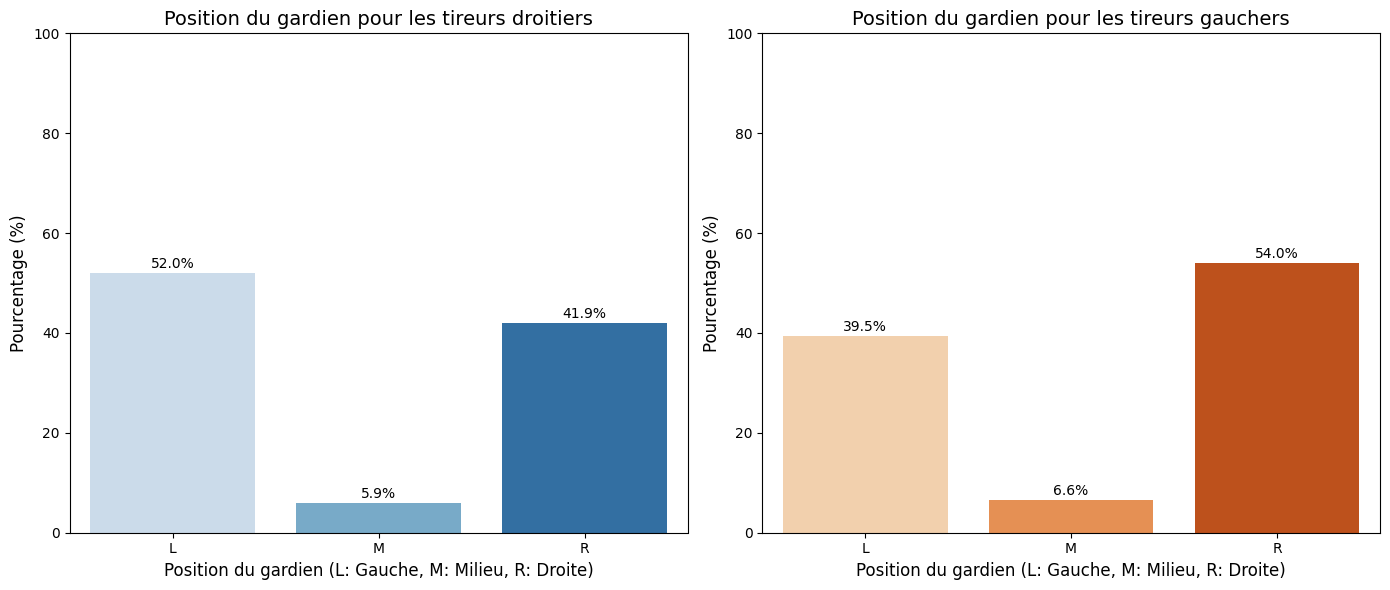

In [506]:
# Définir l'ordre des positions des gardiens
keeper_order = ['L', 'M', 'R']

# Calcul des pourcentages pour les droitiers
right_footed = df[df['Foot'] == 'R']
right_keeper_counts = right_footed['Keeper'].value_counts(normalize=True) * 100
right_keeper_counts = right_keeper_counts.reindex(keeper_order, fill_value=0)

# Calcul des pourcentages pour les gauchers
left_footed = df[df['Foot'] == 'L']
left_keeper_counts = left_footed['Keeper'].value_counts(normalize=True) * 100
left_keeper_counts = left_keeper_counts.reindex(keeper_order, fill_value=0)

# Créer des graphiques pour les pourcentages
plt.figure(figsize=(14, 6))

# Graphique pour les droitiers
plt.subplot(1, 2, 1)
sns.barplot(x=right_keeper_counts.index, y=right_keeper_counts.values, palette='Blues', order=keeper_order)
plt.title("Position du gardien pour les tireurs droitiers", fontsize=14)
plt.xlabel("Position du gardien (L: Gauche, M: Milieu, R: Droite)", fontsize=12)
plt.ylabel("Pourcentage (%)", fontsize=12)
plt.ylim(0, 100)
for i, v in enumerate(right_keeper_counts.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

# Graphique pour les gauchers
plt.subplot(1, 2, 2)
sns.barplot(x=left_keeper_counts.index, y=left_keeper_counts.values, palette='Oranges', order=keeper_order)
plt.title("Position du gardien pour les tireurs gauchers", fontsize=14)
plt.xlabel("Position du gardien (L: Gauche, M: Milieu, R: Droite)", fontsize=12)
plt.ylabel("Pourcentage (%)", fontsize=12)
plt.ylim(0, 100)
for i, v in enumerate(left_keeper_counts.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

# Afficher les graphiques
plt.tight_layout()
plt.savefig("position_gardien.png", dpi=300)  # Enregistrement de la figure
plt.show()


On remarque que les joueurs ont une tendance à tirer de leur côté naturel (croisé).

Regardons plus précisemment pour chaque zone.

/var/folders/1p/1m8pwlhx1fl13sl23s4fqslw0000gn/T/ipykernel_7403/350631610.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=right_zone_distribution.index, y=right_zone_distribution.values, palette='Blues', order=zone_order)
/var/folders/1p/1m8pwlhx1fl13sl23s4fqslw0000gn/T/ipykernel_7403/350631610.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=left_zone_distribution.index, y=left_zone_distribution.values, palette='Oranges', order=zone_order)
/var/folders/1p/1m8pwlhx1fl13sl23s4fqslw0000gn/T/ipykernel_7403/350631610.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False

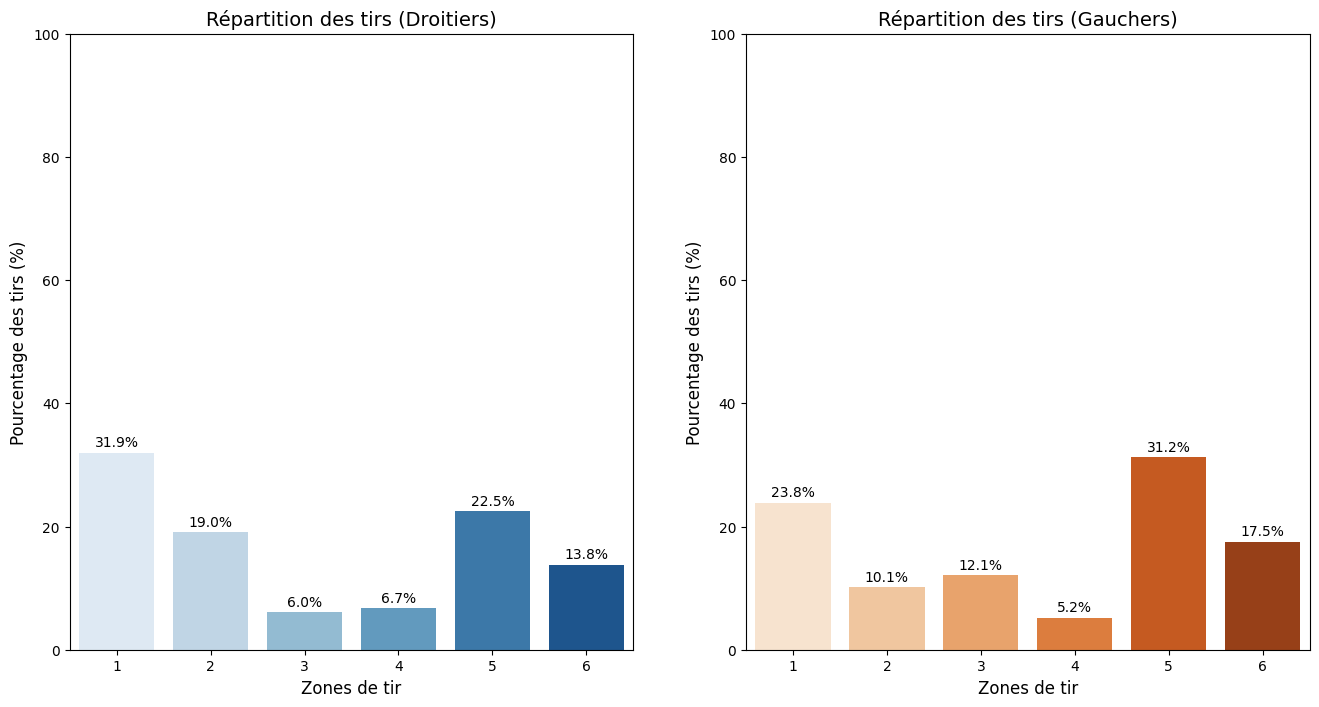

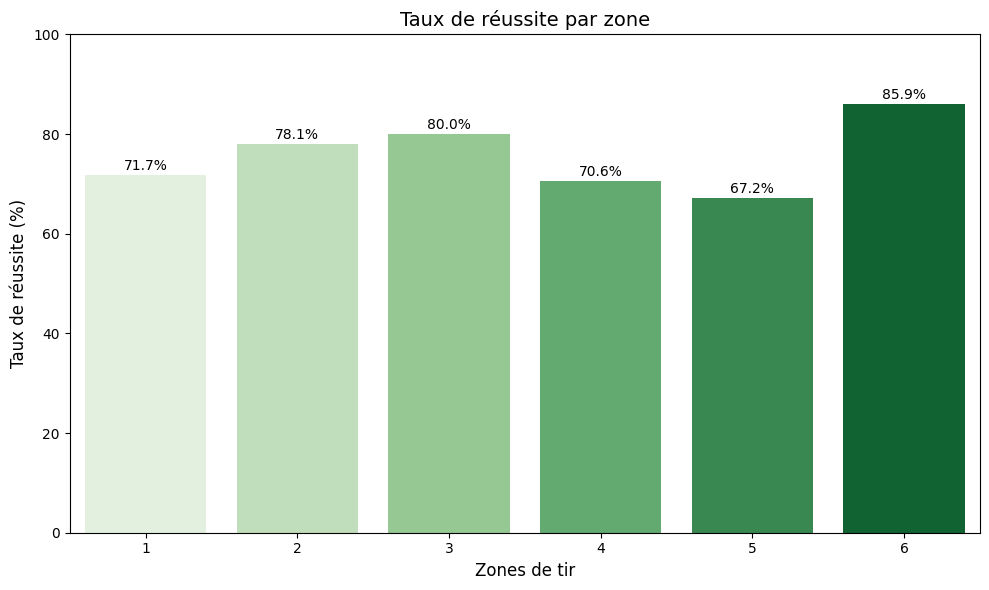

In [507]:
zone_order = [1, 2, 3, 4, 5, 6]

# Répartition des tirs par zone pour les droitiers
right_footed = df[df['Foot'] == 'R']
right_zone_distribution = right_footed['Zone'].value_counts(normalize=True) * 100
right_zone_distribution = right_zone_distribution.reindex(zone_order, fill_value=0)

# Répartition des tirs par zone pour les gauchers
left_footed = df[df['Foot'] == 'L']
left_zone_distribution = left_footed['Zone'].value_counts(normalize=True) * 100
left_zone_distribution = left_zone_distribution.reindex(zone_order, fill_value=0)

# Taux de réussite dans chaque zone
success_rate_per_zone = df.groupby('Zone')['Goal'].mean() * 100
success_rate_per_zone = success_rate_per_zone.reindex(zone_order, fill_value=0)


plt.figure(figsize=(16, 8))

# Répartition des tirs par zone pour droitiers et gauchers
plt.subplot(1, 2, 1)
sns.barplot(x=right_zone_distribution.index, y=right_zone_distribution.values, palette='Blues', order=zone_order)
plt.title("Répartition des tirs (Droitiers)", fontsize=14)
plt.xlabel("Zones de tir", fontsize=12)
plt.ylabel("Pourcentage des tirs (%)", fontsize=12)
plt.ylim(0, 100)
for i, v in enumerate(right_zone_distribution.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

plt.subplot(1, 2, 2)
sns.barplot(x=left_zone_distribution.index, y=left_zone_distribution.values, palette='Oranges', order=zone_order)
plt.title("Répartition des tirs (Gauchers)", fontsize=14)
plt.xlabel("Zones de tir", fontsize=12)
plt.ylabel("Pourcentage des tirs (%)", fontsize=12)
plt.ylim(0, 100)
for i, v in enumerate(left_zone_distribution.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

# Taux de réussite par zone
plt.figure(figsize=(10, 6))
sns.barplot(x=success_rate_per_zone.index, y=success_rate_per_zone.values, palette='Greens', order=zone_order)
plt.title("Taux de réussite par zone", fontsize=14)
plt.xlabel("Zones de tir", fontsize=12)
plt.ylabel("Taux de réussite (%)", fontsize=12)
plt.ylim(0, 100)
for i, v in enumerate(success_rate_per_zone.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

zone_counts = df['Zone'].value_counts().reindex(zone_order, fill_value=0)



Comme on le sait de la littérature, alors que les zones 1 et 5 sont celles qui sont le plus choisies par les joueurs alors que ce sont celles pour lesquelles le taux de réussite est significativement plus bas.

_________________________________________________________________________________________________________________________________________________

Création de certaines images fournies dans le rapport final.

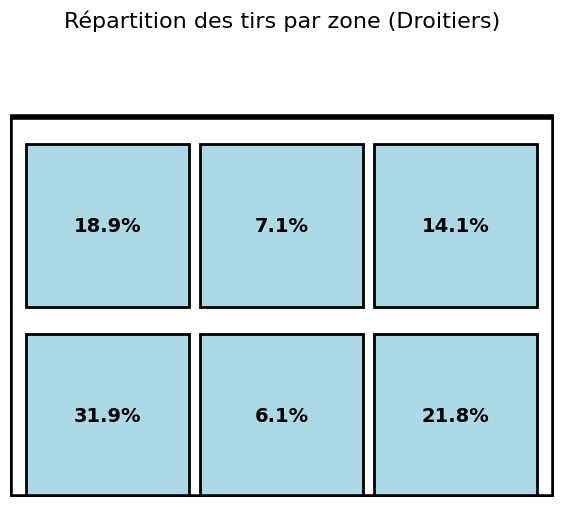

In [508]:
import matplotlib.pyplot as plt

# Données simulées pour les pourcentages de chaque zone
zone_percentages_right = {
    1: 31.9,  # Bas gauche
    2: 18.9,   # Haut gauche
    3: 6.1,  # Bas milieu
    4: 7.1,   # Haut milieu
    5: 21.8,  # Bas droite
    6: 14.1,  # Haut droite
}


fig, ax = plt.subplots(figsize=(8, 6))

zone_positions = {
    1: (0.03, 0, 0.3, 0.3),
    2: (0.03, 0.35, 0.3, 0.3),
    3: (0.35, 0, 0.3, 0.3),
    4: (0.35, 0.35, 0.3, 0.3),
    5: (0.67, 0, 0.3, 0.3),
    6: (0.67, 0.35, 0.3, 0.3),
}

# Dessiner chaque zone
for zone, (x, y, width, height) in zone_positions.items():
    # Rectangle pour la zone
    ax.add_patch(plt.Rectangle((x, y), width, height, edgecolor='black', facecolor='lightblue', lw=2))
    # Texte pourcentage
    ax.text(
        x + width / 2, y + height / 2, f"{zone_percentages_right[zone]:.1f}%",
        color='black', ha='center', va='center', fontsize=14, weight='bold'
    )

# Ajouter une barre noire autour pour simuler une cage de football
ax.add_patch(plt.Rectangle((0, 0), 1, 0.7, edgecolor='black', facecolor='none', lw=4))


ax.set_xlim(0, 1)
ax.set_ylim(0, 0.85)
ax.set_aspect('equal')
ax.axis('off')
plt.title("Répartition des tirs par zone (Droitiers)", fontsize=16)
plt.savefig("repartition_tirs_zone_droitiers.png", dpi=300)  # Enregistrement de la figure
plt.show()


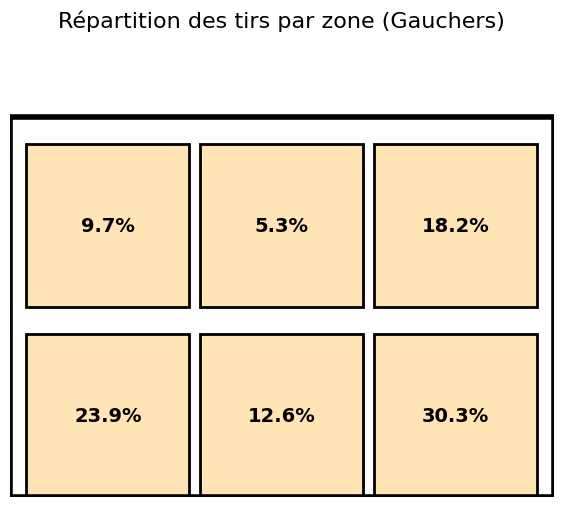

In [509]:
zone_percentages_left = {
    1: 23.9,  # Bas gauche
    2: 9.7,  # Haut gauche
    3: 12.6,  # Bas milieu
    4: 5.3,   # Haut milieu
    5: 30.3,  # Bas droite
    6: 18.2,  # Haut droite
}

fig, ax = plt.subplots(figsize=(8, 6))

zone_positions = {
    1: (0.03, 0, 0.3, 0.3),
    2: (0.03, 0.35, 0.3, 0.3),
    3: (0.35, 0, 0.3, 0.3),
    4: (0.35, 0.35, 0.3, 0.3),
    5: (0.67, 0, 0.3, 0.3),
    6: (0.67, 0.35, 0.3, 0.3),
}

for zone, (x, y, width, height) in zone_positions.items():
    ax.add_patch(plt.Rectangle((x, y), width, height, edgecolor='black', facecolor='moccasin', lw=2))
    ax.text(
        x + width / 2, y + height / 2, f"{zone_percentages_left[zone]:.1f}%",
        color='black', ha='center', va='center', fontsize=14, weight='bold'
    )

ax.add_patch(plt.Rectangle((0, 0), 1, 0.7, edgecolor='black', facecolor='none', lw=4))
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.85)
ax.set_aspect('equal')
ax.axis('off')
plt.title("Répartition des tirs par zone (Gauchers)", fontsize=16)
plt.savefig("repartition_tirs_zone_gauchers.png", dpi=300)  # Enregistrement de la figure
plt.show()


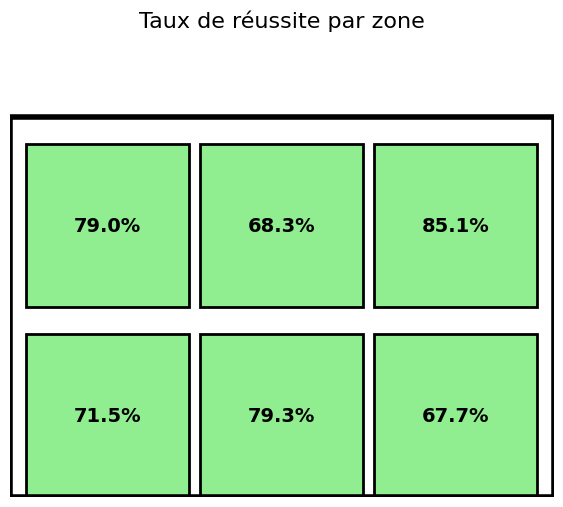

In [510]:
zone_percentages = {
    1: 71.5,  # Bas gauche
    2: 79,  # Haut gauche
    3: 79.3,  # Bas milieu
    4: 68.3,   # Haut milieu
    5: 67.7,  # Bas droite
    6: 85.1,  # Haut droite
}
fig, ax = plt.subplots(figsize=(8, 6))
zone_positions = {
    1: (0.03, 0, 0.3, 0.3),
    2: (0.03, 0.35, 0.3, 0.3),
    3: (0.35, 0, 0.3, 0.3),
    4: (0.35, 0.35, 0.3, 0.3),
    5: (0.67, 0, 0.3, 0.3),
    6: (0.67, 0.35, 0.3, 0.3),
}

for zone, (x, y, width, height) in zone_positions.items():
    ax.add_patch(plt.Rectangle((x, y), width, height, edgecolor='black', facecolor='lightgreen', lw=2))
    ax.text(
        x + width / 2, y + height / 2, f"{zone_percentages[zone]:.1f}%",
        color='black', ha='center', va='center', fontsize=14, weight='bold'
    )

ax.add_patch(plt.Rectangle((0, 0), 1, 0.7, edgecolor='black', facecolor='none', lw=4))
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.85)
ax.set_aspect('equal')
ax.axis('off')
plt.title("Taux de réussite par zone", fontsize=16)
plt.savefig("taux_reussite_zone.png", dpi=300)  # Enregistrement de la figure
plt.show()


_________________________________________________________________________________________________________________________________________________

Ci-dessous, une régression logistique qui a pour but d'expliquer la variable 'But' en fonction des autres.

In [511]:
# Ici, on va concaténer toutes les données pour faire une analyse globale
df = pd.concat([can_df, cdm_df, euro_df, ucl_df, cdf_df, europa_df, cdmc_df], ignore_index=True)

# Remplacer les virgules par des points et convertir en float
df['duration_sifflet'] = df['duration_sifflet'].astype(str).str.replace(',', '.').astype(float)
df['duration_ball'] = df['duration_ball'].astype(str).str.replace(',', '.').astype(float)
df['Keeper_moovs'] = df['Keeper_moovs'].str.strip()  # Enlève les espaces autour de la chaîne

df.dropna(subset=['Goal', 'Zone', 'Foot', 'Keeper', 'Qualif', 'Elimination', 'Keeper_moovs', 'duration_sifflet', 'duration_ball'], inplace=True)
df = pd.get_dummies(df, columns=['Zone', 'Foot', 'Keeper', 'Qualif', 'Elimination', 'Keeper_moovs'], drop_first=True)

X = df.drop(columns=['Goal', 'game_ID', 'Year', 'Team', 'Penalty_number', 'arret', 'competition'], errors='ignore')
y = df['Goal']

X = X.apply(pd.to_numeric, errors='coerce')  
y = pd.to_numeric(y, errors='coerce').astype(int)  

X = sm.add_constant(X)
X = X.apply(pd.to_numeric, errors='coerce')
 
y = (y == 1).astype(int) 

X.dropna(inplace=True)
y = y.loc[X.index]  

X = X.astype(int)

model = sm.Logit(y, X)
result = model.fit()
print("Dans la régression ci-dessous, on explique la variable Goal par les autres variables")
print(result.summary())

Les variables significatives sont le tir dans les zones 2 et 6 qui ont un impact positif sur la réussite d'un tir au but. L'autre variable significative, c'est les mouvements du gardiens qui, comme vu précedemment, possède un impact négatif sur la réussite d'un but.

_________________________________________________________________________________________________________________________________________________

## Partie 5 : L'ordre de tir influence-t-il l'issue d'une séance

### 5.1 : l'équipe qui commence a-t-elle un avantage ?

In [512]:
# On réécris le dataframe pour retirer les dummies créer précédemment
df = pd.concat([can_df, cdm_df, euro_df, ucl_df, cdf_df, europa_df, cdmc_df, copa_df, gc_df, cl_df])

In [513]:
print("_____________________________________________________________________________________________________________")

In [514]:
print('\n'+"Partie 5 : l'ordre de tir influence-t-il l'issue d'une séance" + '\n')

Ci-dessous on fait le test sur l'impact du tirage au sort.

In [515]:
# Pour connaître l'équipe gagnante, on va regarder pour chaque séance de nombre de buts marqués lorsque la variable Penalty_number est impair ou pair
grouped = df.groupby(['game_ID'])
odd_goals = grouped.apply(lambda x: x[x['Penalty_number'] % 2 != 0]['Goal'].sum())
even_goals = grouped.apply(lambda x: x[x['Penalty_number'] % 2 == 0]['Goal'].sum())

goals_by_group = pd.DataFrame({
    'Odd_goals': odd_goals,
    'Even_goals': even_goals
})

# La première équipe gagne si odd_goals > even_goals:
count = (goals_by_group['Odd_goals'] > goals_by_group['Even_goals']).sum()

proportion = count / goals_by_group.shape[0]
proportion = proportion * 100
print(f"pourcentage de chance de gagner en tirant en premier : {proportion:.2f}")

# On fait le test pour voir s'il y a une différence significative
n = 172
p = 0.5
X = binom(n, p)
p_less = X.cdf(0.5145*172)
p_less = 1 - p_less

print(f"p-valeur du test 'H_0 = pas d'impact du tirage au sort' contre 'H_1 = impact du tirage au sort' : {p_less:.2f}")
print('\n')




/var/folders/1p/1m8pwlhx1fl13sl23s4fqslw0000gn/T/ipykernel_7403/930973904.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  odd_goals = grouped.apply(lambda x: x[x['Penalty_number'] % 2 != 0]['Goal'].sum())
/var/folders/1p/1m8pwlhx1fl13sl23s4fqslw0000gn/T/ipykernel_7403/930973904.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  even_goals = grouped.apply(lambda x: x[x['Penalty_number'] % 2 == 0]['Goal'

La p-valeur est trop élevée pour déduire quoique ce soit.

_________________________________________________________________________________________________________________________________________________

Ci-dessous, nous nous intéressons à l'équipe qui rate en premier.

In [516]:
compteur = 0 # variable pour compter le nombre de fois où l'équipe qui a raté en premier a gagné
b = 0

# Parcourir chaque groupe de game_ID
for game_id, group in df.groupby('game_ID'):
    # qui gagne la séance
    b += 1 # variable pour compter le nombre de séances
    equipe1 = 0 # compter le score de l'équipe 1
    equipe2 = 0 # compter le score de l'équipe 2
    a = 0 # variable d'arrêt pour savoir si on a trouvé celui qui a raté en premier
    rate_en_premier = 0 # variable qui prend la valeur 1 ou 2 selon l'équipe qui a raté en premier
    for i in range(len(group)):
        if group['Penalty_number'].iloc[i]%2 ==0:
            if group['Goal'].iloc[i] == 1:
                # on incrémente le score de l'équipe 1
                equipe1 += 1
        else:
            if group['Goal'].iloc[i] == 1:
                # on incrémente le score de l'équipe 2
                equipe2 += 1
        if (i%2 == 0 and equipe1 == equipe2) and a==0 : # condition pour que l'équipe 1 rate en premier
            rate_en_premier = 1
            a = 1
        if (i%2 == 1 and equipe1 == equipe2+2) and a==0: # condition pour que l'équipe 2 rate en premier
            rate_en_premier = 2
            a = 1
    winner = 0
    if equipe1 > equipe2:
        winner = 1
    elif equipe2 > equipe1:
        winner = 2
    

    if rate_en_premier == winner:
        compteur += 1

compteur = (compteur/b)*100
print(f"La probabilité de gagner la séance de tir au but en étant le premier a raté est {compteur:.2f}%")

# calcul de la p valeur
n = compteur
p = 0.5
X = binom(n, p)
p_less = X.cdf(0.4566*79)
print(f"p-valeur du test 'H_0 = pas d'impact du tirage au sort' contre 'H_1 = impact du tirage au sort' : {p_less:.2f}")
print('\n')
    

_________________________________________________________________________________________________________________________________________________

taux de réussite de chaque tir lors d'une séance de tir au but.

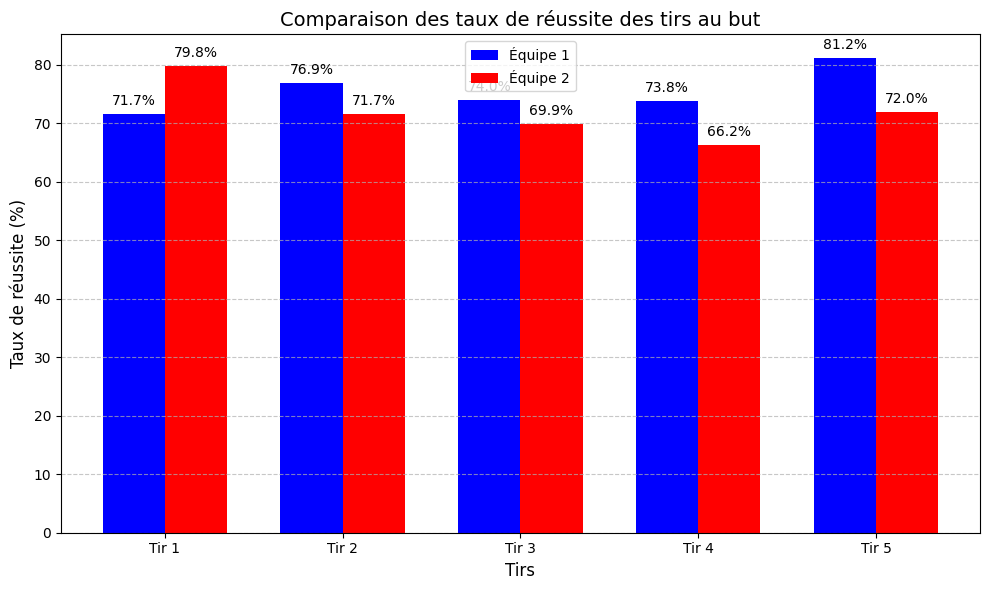

In [517]:
# on va compter le pourcentage de tirs réussis pour chaque tir de la séance de pénalties.
team_1_success = [] 
team_2_success = []

for i in range(1, 6):
    # Tirs de l'équipe 1 (impairs)
    team_1_filter = df[df['Penalty_number'] == (2 * i - 1)]
    team_1_success_rate = (team_1_filter['Goal'].sum() / len(team_1_filter)) * 100 if len(team_1_filter) > 0 else 0
    team_1_success.append(team_1_success_rate)

    # Tirs de l'équipe 2 (pairs)
    team_2_filter = df[df['Penalty_number'] == (2 * i)]
    team_2_success_rate = (team_2_filter['Goal'].sum() / len(team_2_filter)) * 100 if len(team_2_filter) > 0 else 0
    team_2_success.append(team_2_success_rate)


data = {
    'Tir': [f'Tir {i}' for i in range(1, 6)],
    'Équipe 1': team_1_success,
    'Équipe 2': team_2_success
}
graph_df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(graph_df))
bar1 = plt.bar(x, graph_df['Équipe 1'], width=bar_width, label='Équipe 1', color='blue')
bar2 = plt.bar([i + bar_width for i in x], graph_df['Équipe 2'], width=bar_width, label='Équipe 2', color='red')

# affichage du pourcentage au dessus de chaque barre
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=10)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Tirs', fontsize=12)
plt.ylabel('Taux de réussite (%)', fontsize=12)
plt.title('Comparaison des taux de réussite des tirs au but', fontsize=14)
plt.xticks([i + bar_width / 2 for i in x], graph_df['Tir'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("comparaison_taux_reussite.png", dpi=300)  # Enregistrement de la figure
plt.show()

_________________________________________________________________________________________________________________________________________________

## Partie 6 : influence du contexte du tir

### 6.1 : Tir décisif, tir de break, survie et rattrapage

In [518]:
print("_____________________________________________________________________________________________________________")

In [519]:
print("Partie 6 : Influence du contexte du tir"+'\n')

In [520]:
# on compare les tirs pour la qualification et pour l'élimination
tir_qualif = df[df['Qualif'] == 'Y'].shape[0]
tir_qualif_reussi = df[df['Qualif'] == 'Y']['Goal'].mean()
tir_qualif_reussi = tir_qualif_reussi * 100
print(f"Taux de réussite des tirs pour la qualification : {tir_qualif_reussi:.2f}% pour {tir_qualif} tirs")

tir_elimination = df[df['Elimination'] == 'Y'].shape[0]
tir_elimination_reussi = df[df['Elimination'] == 'Y']['Goal'].mean()
tir_elimination_reussi = tir_elimination_reussi * 100
print(f"Taux de réussite des tirs pour l'élimination : {tir_elimination_reussi:.2f}% pour {tir_elimination} tirs")
print('\n')

Lorsque l'équipe tire pour la qualification, le taux de réussite du tir est sigificativement plus élevé.

Lorsque l'équipe tire pour ne pas être éliminé, l'équipe ne réussi ni mieux, ni moins bien qu'en général.

_________________________________________________________________________________________________________________________________________________

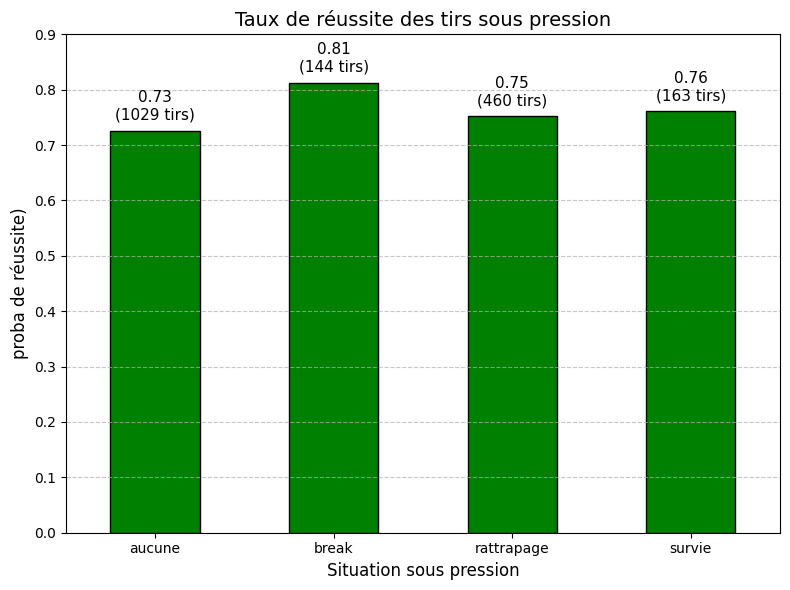

In [521]:
# Identifier les tirs sous pression dans chaque séance
def identifier_tirs_sous_pression(df):
    resultats = []
    
    aucune = 0
    rattrapage = 0
    break1 = 0
    survie = 0

    
    for game_ID, groupe in df.groupby("game_ID"):
        groupe = groupe.sort_values("Penalty_number").copy()
        
        equipes = groupe["Team"].unique()
        
        # le code en commentaire ci-dessous permet de vérifier qu'il n'y a pas d'erreurs dans les données
        # si vous utilisez ce notebook, n'hésitez pas à décommenter cette partie pour vérifier les données
        # if len(equipes) != 2:
        #     print(f"⚠️ Problème avec game_ID {game_ID}: {equipes}")
        #     continue  # On ignore cette séance
        
        equipe1, equipe2 = equipes
        score = {equipe1: 0, equipe2: 0}
        tirs_counts = {equipe1: 0, equipe2: 0}
        
        for i in range(len(groupe)):
            row = groupe.iloc[i]
            equipe_tireur = row["Team"]
            equipe_gardien = groupe.iloc[i - 1]["Team"] if i > 0 else groupe.iloc[i + 1]["Team"]
            
            
            
            # Identifier les trois situations sous pression
            situation = "aucune"
            if score[equipe_gardien]-1 == score[equipe_tireur] and tirs_counts[equipe_gardien]-1 == tirs_counts[equipe_tireur]:
                situation = "rattrapage"
                rattrapage+=1
            elif score[equipe_tireur]-1 == score[equipe_gardien] and tirs_counts[equipe_tireur] == tirs_counts[equipe_gardien]:
                situation = "break"
                break1+=1
            elif score[equipe_gardien]-1 == score[equipe_tireur] and tirs_counts[equipe_tireur] == tirs_counts[equipe_gardien]:
                situation = "survie"
                survie+=1
            
            if situation == "aucune":
                aucune+=1
                
            tirs_counts[equipe_tireur] += 1
            if row["Goal"] == 1:
                score[equipe_tireur] += 1
            
            resultats.append({
                "game_ID": game_ID,
                "Penalty_number": row["Penalty_number"],
                "Team": equipe_tireur,
                "situation": situation,
                "Goal": row["Goal"]
            })
    
    return pd.DataFrame(resultats), aucune, rattrapage, break1, survie

df_sous_pression, a, b, c, d = identifier_tirs_sous_pression(df)

print("nb de tir aucune: ", a)
print("nb de tir rattrapage: ", b)
print("nb de tir break: ", c)
print("nb de tir survie: ", d)
print('\n')

nb_tirs = df_sous_pression.groupby("situation").size()

taux_reussite = df_sous_pression.groupby("situation")["Goal"].mean()
print(taux_reussite)

nombres_tirs = {
    "aucune": a,
    "rattrapage": b,
    "break": c,
    "survie": d
}

plt.figure(figsize=(8, 6))
taux_reussite.plot(kind='bar', color='green', edgecolor='black')
plt.title("Taux de réussite des tirs sous pression", fontsize=14)
plt.xlabel("Situation sous pression", fontsize=12)
plt.ylabel("proba de réussite)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les annotations au-dessus des barres
for i, (situation, valeur) in enumerate(taux_reussite.items()):
    nb = nombres_tirs[situation]
    plt.text(i, valeur + 0.02, f"{valeur:.2f}\n({nb} tirs)", ha='center', fontsize=11)

    
plt.ylim(0, 0.9)
plt.tight_layout()
plt.savefig("taux_reussite_sous_pression.png", dpi=300)  # Enregistrement de la figure
plt.show()



In [522]:
# Calcul des p valeurs pour les différents tirs par rapport à la situation "aucune"

p_aucune  = 0.725948
n_rattrapage  = 460
n_break = 144
n_survie = 163
p_rattrapage = 0.752174
p_break = 0.812500
p_survie = 0.760736

p_valeur_rattrapage = binom(n_rattrapage, p_aucune).cdf(p_rattrapage*n_rattrapage)
p_valeur_rattrapage = 1 - p_valeur_rattrapage

p_valeur_break = binom(n_break, p_aucune).cdf(p_break*n_break)
p_valeur_break = 1 - p_valeur_break

p_valeur_survie = binom(n_survie, p_aucune).cdf(p_survie*n_survie)
p_valeur_survie = 1 - p_valeur_survie
print('\n'+"p-valeurs pour les tirs sous pression par rapport à la situation 'aucune' :")
print(f"p-valeur rattrapage : {p_valeur_rattrapage:.2f}")
print(f"p-valeur break : {p_valeur_break:.2f}")
print(f"p-valeur survie : {p_valeur_survie:.2f}")


Lorsque le tireur est en situation de break, il a significativement plus de chance de réussite que dans les autres situations.

_________________________________________________________________________________________________________________________________________________

## Partie 7 : Les stratégies sont-elles équilibrées ?

In [523]:
print("_____________________________________________________________________________________________________________")

In [524]:
print('\n'+ "Partie 7 : Les stratégies sont-elles équilibrées"+'\n') 

In [525]:

# Ici, on va séparer les données en deux dataframes : un pour les grandes compétitions et un pour les autres compétitions
df_grandes_competitions = pd.concat([euro_df, cdm_df, ucl_df])
df_autres_competitions = pd.concat([can_df, europa_df, copa_df, cdmc_df, cdf_df, gc_df, cl_df])

# Nombre de tirs pour df_grandes_competitions et df_autres_competitions
tirs_grandes_competitions = df_grandes_competitions.shape[0]
tirs_autres_competitions = df_autres_competitions.shape[0]
print(f"Nombre de tirs dans les grandes compétitions : {tirs_grandes_competitions}")
print(f"Nombre de tirs dans les autres compétitions : {tirs_autres_competitions}")


df_grandes_competitions = pd.get_dummies(df_grandes_competitions, columns=['Zone'], drop_first=False)
df_autres_competitions = pd.get_dummies(df_autres_competitions, columns=['Zone'], drop_first=False)
df_grandes_competitions.columns = [col.replace('.0', '') if 'Zone' in col else col for col in df_grandes_competitions.columns]
df_autres_competitions.columns = [col.replace('.0', '') if 'Zone' in col else col for col in df_autres_competitions.columns]

# On va créer une nouvelle colonne pour la zone de tir
df_grandes_competitions['tir_right'] = df_grandes_competitions['Zone_5'] + df_grandes_competitions['Zone_6']
df_grandes_competitions['tir_left'] = df_grandes_competitions['Zone_1'] + df_grandes_competitions['Zone_2']
df_grandes_competitions['tir_middle'] = df_grandes_competitions['Zone_3'] + df_grandes_competitions['Zone_4']

df_autres_competitions['tir_right'] = df_autres_competitions['Zone_5'] + df_autres_competitions['Zone_6']
df_autres_competitions['tir_left'] = df_autres_competitions['Zone_1'] + df_autres_competitions['Zone_2']
df_autres_competitions['tir_middle'] = df_autres_competitions['Zone_3'] + df_autres_competitions['Zone_4']

print('\n')


_________________________________________________________________________________________________________________________________________________

### Analyse pour les grandes compétitions

In [526]:
print("ANALYSE POUR LES GRANDES COMPETITIONS :"+'\n')

In [527]:
# on va regarder la probabilité de réussir son pénalty en fonction du pied du tireur et de où est-ce qu'il a tiré.
categories = ['right', 'left', 'middle']
feet = ['R', 'L']

print("on va regarder la probabilité de réussir son pénalty en fonction du pied du tireur et de où est-ce qu'il a tiré.")
for foot in feet:
    for category in categories:
        nb_shots = df_grandes_competitions[(df_grandes_competitions['Foot'] == foot) & (df_grandes_competitions[f'tir_{category}'] == 1)].shape[0]
        goal_percentage = df_grandes_competitions[(df_grandes_competitions['Foot'] == foot) & (df_grandes_competitions[f'tir_{category}'] == 1)]['Goal'].mean()
        
        print(f"Nombre de tirs {category} pour un tireur {'droitier' if foot == 'R' else 'gaucher'} : {nb_shots}" + f" avec une probabiilité de réussite de {goal_percentage:.4f}")

print('\n')

In [528]:
# de même que précédemment en ajoutant si le gardien va à droite ou à gauche
categories = ['right', 'left'] # tir à droite et à gauche
feet = ['R', 'L'] # tireur droitier ou gaucher
keepers = {'R': 'right', 'L': 'left'} # gardien qui va à droite ou à gauche

print("De même que précédemment en ajoutant si le gardien va à droite ou à gauche")
for foot in feet:
    for keeper, keeper_dir in keepers.items():
        for category in categories:
            nb_shots = df_grandes_competitions[
                (df_grandes_competitions['Foot'] == foot) & 
                (df_grandes_competitions[f'tir_{category}'] == 1) & 
                (df_grandes_competitions['Keeper'] == keeper)
            ].shape[0]
            
            goal_percentage = df_grandes_competitions[
                (df_grandes_competitions['Foot'] == foot) & 
                (df_grandes_competitions[f'tir_{category}'] == 1) & 
                (df_grandes_competitions['Keeper'] == keeper)
            ]['Goal'].mean()
            
            print(f"Nombre de tirs à {category} pour un tireur {'droitier' if foot == 'R' else 'gaucher'} et un gardien qui va à {keeper_dir} : {nb_shots}" + f" avec une probabilité de réussite de {goal_percentage:.4f}")
            
print('\n')

In [529]:
# Calcul du nombre de pénalty pour chaque situation
feet = ['R', 'L'] # pied fort du tireur
shot_directions = ['right', 'left', 'middle'] # l'emplacement du tir
keeper_positions = ['R', 'L', 'M'] # position du gardien

results = {}

for foot in feet:
    for shot in shot_directions:
        for keeper in keeper_positions:
            key = f"{foot}{shot[0].upper()}{keeper}"
            count = df_grandes_competitions[
                (df_grandes_competitions[f'tir_{shot}'] == 1) & 
                (df_grandes_competitions['Keeper'] == keeper) & 
                (df_grandes_competitions['Foot'] == foot)
            ].shape[0]
            results[key] = count

# Affichage des résultats formatés
# Ici RRR signifie un droitier qui tire à droite et un gardien qui va à droite
print("Ci dessous, RRR signifie un droitier qui tire à droite et un gardien qui va à droite.")
print(f"RRR: {results['RRR']}, RRL: {results['RRL']}, RRM: {results['RRM']}")
print(f"RLR: {results['RLR']}, RLL: {results['RLL']}, RLM: {results['RLM']}")
print(f"RMR: {results['RMR']}, RML: {results['RML']}, RMM: {results['RMM']}")
print(f"LRR: {results['LRR']}, LRL: {results['LRL']}, LRM: {results['LRM']}")
print(f"LLR: {results['LLR']}, LLL: {results['LLL']}, LLM: {results['LLM']}")
print(f"LMR: {results['LMR']}, LML: {results['LML']}, LMM: {results['LMM']}")
print('\n')

In [530]:
# Calcul du pourcentage de réussite pour chaque situation
feet = ['R', 'L'] # pied fort du tireur
shot_directions = ['right', 'left', 'middle'] # l'emplacement du tir
keeper_positions = ['R', 'L', 'M'] # position du gardien

results = {}

for foot in feet:
    for shot in shot_directions:
        for keeper in keeper_positions:
            key = f"{foot}{shot[0].upper()}{keeper}"
            
            # Nombre total de tirs dans cette configuration
            total_shots = df_grandes_competitions[
                (df_grandes_competitions[f'tir_{shot}'] == 1) & 
                (df_grandes_competitions['Keeper'] == keeper) & 
                (df_grandes_competitions['Foot'] == foot)
            ].shape[0]
            
            # Nombre de buts marqués dans cette configuration
            goals = df_grandes_competitions[
                (df_grandes_competitions[f'tir_{shot}'] == 1) & 
                (df_grandes_competitions['Keeper'] == keeper) & 
                (df_grandes_competitions['Foot'] == foot) & 
                (df_grandes_competitions['Goal'] == 1)
            ].shape[0]
            
            # Probabilité de marquer (évite la division par zéro)
            prob = (goals / total_shots * 100) if total_shots > 0 else 0
            results[key] = prob

# Affichage des résultats formatés
print("De même que précédemment avec les probabilités de réussite")
print(f"RRR: {results['RRR']:.2f}%, RRL: {results['RRL']:.2f}%, RRM: {results['RRM']:.2f}%")
print(f"RLR: {results['RLR']:.2f}%, RLL: {results['RLL']:.2f}%, RLM: {results['RLM']:.2f}%")
print(f"RMR: {results['RMR']:.2f}%, RML: {results['RML']:.2f}%, RMM: {results['RMM']:.2f}%")
print(f"LRR: {results['LRR']:.2f}%, LRL: {results['LRL']:.2f}%, LRM: {results['LRM']:.2f}%")
print(f"LLR: {results['LLR']:.2f}%, LLL: {results['LLL']:.2f}%, LLM: {results['LLM']:.2f}%")
print(f"LMR: {results['LMR']:.2f}%, LML: {results['LML']:.2f}%, LMM: {results['LMM']:.2f}%")
print('\n')


_________________________________________________________________________________________________________________________________________________

In [531]:
# On va créer une nouvelle colonne pour la position du gardien
df_grandes_competitions = pd.get_dummies(df_grandes_competitions, columns=['Keeper'], drop_first=False)

Regression logistique pour expliquer le tir à droite en fonction de où va le gardien.

In [532]:
# Définir la variable cible (Y) et les variables explicatives (X)
df_grandes_competitions['tir_right'] = df_grandes_competitions['tir_right'].astype(int)
df_grandes_competitions['Keeper_M'] = df_grandes_competitions['Keeper_M'].astype(int)
df_grandes_competitions['Keeper_R'] = df_grandes_competitions['Keeper_R'].astype(int)
df_grandes_competitions['Keeper_L'] = df_grandes_competitions['Keeper_L'].astype(int)

X = df_grandes_competitions[['Keeper_M', 'Keeper_R']]
y = df_grandes_competitions['tir_right']

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Ajuster le modèle de régression logistique
model = sm.Logit(y, X)
result = model.fit()

# Afficher les résultats
print("Régression logistique pour prédire la direction du tir en fonction de la position du gardien")
print(result.summary())


_________________________________________________________________________________________________________________________________________________

Regression logistique pour expliquer 'le gardien va droite' en fonction de l'emplacement qu'& choisit le tireur.

In [533]:
# Définir la variable cible (y) et les variables explicatives (X)
X = df_grandes_competitions[['Keeper_M', 'Keeper_R']]
y = df_grandes_competitions['Goal']

# S'assurer que les variables sont bien binaires (0 ou 1)
X = X.astype(int)
y = y.astype(int)

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Ajuster le modèle de régression logistique
model = sm.Logit(y, X)
result = model.fit()

# Afficher les résultats
print("Régression logistique pour prédire la réussite du tir en fonction de la position du gardien")
print(result.summary())
print('\n')

In [534]:
# Définir la variable cible (y) et les variables explicatives (X)
X = df_grandes_competitions[['tir_left', 'tir_right']]
y = df_grandes_competitions['Goal']

# S'assurer que les variables sont bien binaires (0 ou 1)
X = X.astype(int)
y = y.astype(int)

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Ajuster le modèle de régression logistique
model = sm.Logit(y, X)
result = model.fit()

# Afficher les résultats
print("Régression logistique pour prédire la réussite du tir en fonction de la direction du tir")
print(result.summary())
print('\n')

In [535]:
# Définir la variable cible (y) et les variables explicatives (X)
X = df_grandes_competitions[['tir_middle', 'tir_right']]
y = df_grandes_competitions['Keeper_R']

# S'assurer que les variables sont bien binaires (0 ou 1)
X = X.astype(int)
y = y.astype(int)

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Ajuster le modèle de régression logistique
model = sm.Logit(y, X)
result = model.fit()

# Afficher les résultats
print("Régression logistique pour prédire la position du gardien en fonction de la direction du tir")
print(result.summary())
print('\n')

_________________________________________________________________________________________________________________________________________________

Regardons maintenant l'impact des tirs qui précèdent.

In [536]:
# création des colonnes nécéssaires à notre analyse
df_grandes_competitions['tir_right_prev1'] = df_grandes_competitions.groupby('game_ID')['tir_right'].shift(1)
df_grandes_competitions['tir_left_prev1'] = df_grandes_competitions.groupby('game_ID')['tir_left'].shift(1)
df_grandes_competitions['tir_middle_prev1'] = df_grandes_competitions.groupby('game_ID')['tir_middle'].shift(1)

df_grandes_competitions['tir_right_prev2'] = df_grandes_competitions.groupby('game_ID')['tir_right'].shift(2)
df_grandes_competitions['tir_left_prev2'] = df_grandes_competitions.groupby('game_ID')['tir_left'].shift(2)
df_grandes_competitions['tir_middle_prev2'] = df_grandes_competitions.groupby('game_ID')['tir_middle'].shift(2)

df_grandes_competitions['keeper_prev1_R'] = df_grandes_competitions.groupby('game_ID')['Keeper_R'].shift(1)
df_grandes_competitions['keeper_prev1_L'] = df_grandes_competitions.groupby('game_ID')['Keeper_L'].shift(1)
df_grandes_competitions['keeper_prev1_M'] = df_grandes_competitions.groupby('game_ID')['Keeper_M'].shift(1)

df_grandes_competitions['keeper_prev2_R'] = df_grandes_competitions.groupby('game_ID')['Keeper_R'].shift(2)
df_grandes_competitions['keeper_prev2_L'] = df_grandes_competitions.groupby('game_ID')['Keeper_L'].shift(2)
df_grandes_competitions['keeper_prev2_M'] = df_grandes_competitions.groupby('game_ID')['Keeper_M'].shift(2)

cols_to_convert = ['tir_right', 'tir_left', 'tir_middle',
                   'tir_right_prev1', 'tir_right_prev2',
                   'tir_left_prev1', 'tir_left_prev2',
                   'tir_middle_prev1', 'tir_middle_prev2', 
                   'keeper_prev1_R', 'keeper_prev1_L', 'keeper_prev1_M', 
                   'keeper_prev2_R', 'keeper_prev2_L', 'keeper_prev2_M']

df_grandes_competitions = df_grandes_competitions.dropna(subset=cols_to_convert)
df_grandes_competitions[cols_to_convert] = df_grandes_competitions[cols_to_convert].astype(int)

df_grandes_competitions[cols_to_convert] = df_grandes_competitions[cols_to_convert].astype(int)


Régression logistique ayant pour but d'expliquer tir_right

In [537]:
# Définir les variables explicatives (X) et la variable cible (y)
X = df_grandes_competitions[['tir_right_prev1', 'tir_right_prev2', 'tir_left_prev1', 
                              'tir_left_prev2', 'keeper_prev1_R', 'keeper_prev1_L', 
                              'keeper_prev2_R', 'keeper_prev2_L']]

X = sm.add_constant(X)  # Ajouter une constante

y = df_grandes_competitions['tir_right']  # Garder une variable binaire (0 ou 1)

# Ajuster le modèle de régression logistique binaire
model = sm.Logit(y, X)
result = model.fit()

# Afficher les résultats
print("Régression logistique pour prédire la direction du tir en fonction des tirs précédents et de la position du gardien")
print(result.summary())
print('\n')


Pas de résultat assez significatif si ce n'est presque le tir à gauche au tir précédent mais une p-valeur un peu trop élevée.

_________________________________________________________________________________________________________________________________________________

#### On regarde si les hypothèses de test sont bonnes

In [538]:
print("On regarde les tirs au milieu :")
nb_middle = df_grandes_competitions[(df_grandes_competitions['tir_middle'] == 1)].shape[0]
print(f"Nombre de tirs au milieu : {nb_middle}")

nb_middle_keeper = df_grandes_competitions[(df_grandes_competitions['Keeper_M'] == 1)].shape[0]
print(f"Nombre de gardiens qui vont au milieu : {nb_middle_keeper}")
print('\n')

_________________________________________________________________________________________________________________________________________________

### Analyse pour les autres compétitions, l'analyse est identique

In [539]:
print("_____________________________________________________________________________________________________________")

In [540]:
print("ANALYSE POUR LES AUTRES COMPETITIONS :"+'\n')

In [541]:
categories = ['right', 'left', 'middle']
feet = ['R', 'L']

for foot in feet:
    for category in categories:
        nb_shots = df_autres_competitions[(df_autres_competitions['Foot'] == foot) & (df_autres_competitions[f'tir_{category}'] == 1)].shape[0]
        goal_percentage = df_autres_competitions[(df_autres_competitions['Foot'] == foot) & (df_autres_competitions[f'tir_{category}'] == 1)]['Goal'].mean()
        
        print(f"Nombre de tirs {category} pour un tireur {'droitier' if foot == 'R' else 'gaucher'} : {nb_shots}" + f" avec une probabilité de réussite de {goal_percentage:.4f}")
        
        
print('\n')


In [542]:
categories = ['right', 'left']
feet = ['R', 'L']
keepers = {'R': 'right', 'L': 'left'}

for foot in feet:
    for keeper, keeper_dir in keepers.items():
        for category in categories:
            nb_shots = df_autres_competitions[
                (df_autres_competitions['Foot'] == foot) & 
                (df_autres_competitions[f'tir_{category}'] == 1) & 
                (df_autres_competitions['Keeper'] == keeper)
            ].shape[0]
            
            goal_percentage = df_autres_competitions[
                (df_autres_competitions['Foot'] == foot) & 
                (df_autres_competitions[f'tir_{category}'] == 1) & 
                (df_autres_competitions['Keeper'] == keeper)
            ]['Goal'].mean()
            
            print(f"Nombre de tirs à {category} pour un tireur {'droitier' if foot == 'R' else 'gaucher'} et un gardien qui va à {keeper_dir} : {nb_shots}" + f" avec une probabilité de réussite de {goal_percentage:.4f}")
print('\n')

In [543]:
feet = ['R', 'L']
shot_directions = ['right', 'left', 'middle']
keeper_positions = ['R', 'L', 'M']

results = {}

for foot in feet:
    for shot in shot_directions:
        for keeper in keeper_positions:
            key = f"{foot}{shot[0].upper()}{keeper}"
            count = df_autres_competitions[
                (df_autres_competitions[f'tir_{shot}'] == 1) & 
                (df_autres_competitions['Keeper'] == keeper) & 
                (df_autres_competitions['Foot'] == foot)
            ].shape[0]
            results[key] = count

# Affichage des résultats formatés
print(f"RRR: {results['RRR']}, RRL: {results['RRL']}, RRM: {results['RRM']}")
print(f"RLR: {results['RLR']}, RLL: {results['RLL']}, RLM: {results['RLM']}")
print(f"RMR: {results['RMR']}, RML: {results['RML']}, RMM: {results['RMM']}")
print(f"LRR: {results['LRR']}, LRL: {results['LRL']}, LRM: {results['LRM']}")
print(f"LLR: {results['LLR']}, LLL: {results['LLL']}, LLM: {results['LLM']}")
print(f"LMR: {results['LMR']}, LML: {results['LML']}, LMM: {results['LMM']}")
print('\n')

In [544]:
feet = ['R', 'L']
shot_directions = ['right', 'left', 'middle']
keeper_positions = ['R', 'L', 'M']

results = {}

for foot in feet:
    for shot in shot_directions:
        for keeper in keeper_positions:
            key = f"{foot}{shot[0].upper()}{keeper}"
            
            # Nombre total de tirs dans cette configuration
            total_shots = df_autres_competitions[
                (df_autres_competitions[f'tir_{shot}'] == 1) & 
                (df_autres_competitions['Keeper'] == keeper) & 
                (df_autres_competitions['Foot'] == foot)
            ].shape[0]
            
            # Nombre de buts marqués dans cette configuration
            goals = df_autres_competitions[
                (df_autres_competitions[f'tir_{shot}'] == 1) & 
                (df_autres_competitions['Keeper'] == keeper) & 
                (df_autres_competitions['Foot'] == foot) & 
                (df_autres_competitions['Goal'] == 1)
            ].shape[0]
            
            # Probabilité de marquer (évite la division par zéro)
            prob = (goals / total_shots * 100) if total_shots > 0 else 0
            results[key] = prob

# Affichage des résultats formatés
print(f"RRR: {results['RRR']:.2f}%, RRL: {results['RRL']:.2f}%, RRM: {results['RRM']:.2f}%")
print(f"RLR: {results['RLR']:.2f}%, RLL: {results['RLL']:.2f}%, RLM: {results['RLM']:.2f}%")
print(f"RMR: {results['RMR']:.2f}%, RML: {results['RML']:.2f}%, RMM: {results['RMM']:.2f}%")
print(f"LRR: {results['LRR']:.2f}%, LRL: {results['LRL']:.2f}%, LRM: {results['LRM']:.2f}%")
print(f"LLR: {results['LLR']:.2f}%, LLL: {results['LLL']:.2f}%, LLM: {results['LLM']:.2f}%")
print(f"LMR: {results['LMR']:.2f}%, LML: {results['LML']:.2f}%, LMM: {results['LMM']:.2f}%")
print('\n')

_________________________________________________________________________________________________________________________________________________

In [545]:
df_autres_competitions = pd.get_dummies(df_autres_competitions, columns=['Keeper'], drop_first=False)

Regression logistique pour expliquer le tir à droite en fonction de où va le gardien.

In [546]:
# Définir la variable cible (Y) et les variables explicatives (X)
df_autres_competitions['tir_right'] = df_autres_competitions['tir_right'].astype(int)
df_autres_competitions['Keeper_M'] = df_autres_competitions['Keeper_M'].astype(int)
df_autres_competitions['Keeper_R'] = df_autres_competitions['Keeper_R'].astype(int)
df_autres_competitions['Keeper_L'] = df_autres_competitions['Keeper_L'].astype(int)

X = df_autres_competitions[['Keeper_M', 'Keeper_R']]
y = df_autres_competitions['tir_right']

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Ajuster le modèle de régression logistique
model = sm.Logit(y, X)
result = model.fit()

# Afficher les résultats
print("Régression logistique pour prédire la direction du tir en fonction de la position du gardien")
print(result.summary())
print('\n')

_________________________________________________________________________________________________________________________________________________

On cherche à expliquer le gardien va à droite en fonction du tir à droite et du tir au milieu.

In [547]:
# Définir la variable cible (y) et les variables explicatives (X)
X = df_autres_competitions[['Keeper_M', 'Keeper_R']]
y = df_autres_competitions['Goal']

# S'assurer que les variables sont bien binaires (0 ou 1)
X = X.astype(int)
y = y.astype(int)

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Ajuster le modèle de régression logistique
model = sm.Logit(y, X)
result = model.fit()

# Afficher les résultats
print("Régression logistique pour prédire la réussite du tir en fonction de la position du gardien")
print(result.summary())
print('\n')

In [548]:
# Définir la variable cible (y) et les variables explicatives (X)
X = df_autres_competitions[['tir_middle', 'tir_right']]
y = df_autres_competitions['Goal']

# S'assurer que les variables sont bien binaires (0 ou 1)
X = X.astype(int)
y = y.astype(int)

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Ajuster le modèle de régression logistique
model = sm.Logit(y, X)
result = model.fit()

# Afficher les résultats
print("Régression logistique pour prédire la réussite du tir en fonction de la direction du tir")
print(result.summary())
print('\n')

In [549]:
# Définir la variable cible (y) et les variables explicatives (X)
X = df_autres_competitions[['tir_middle', 'tir_right']]
y = df_autres_competitions['Keeper_R']

# S'assurer que les variables sont bien binaires (0 ou 1)
X = X.astype(int)
y = y.astype(int)

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Ajuster le modèle de régression logistique
model = sm.Logit(y, X)
result = model.fit()

# Afficher les résultats
print("Régression logistique pour prédire la position du gardien en fonction de la direction du tir")
print(result.summary())
print('\n')

_________________________________________________________________________________________________________________________________________________

Ici, nous nous interessons à ce qu'il se passe en fonction des tirs précédents.

In [550]:
df_autres_competitions['tir_right_prev1'] = df_autres_competitions.groupby('game_ID')['tir_right'].shift(1)
df_autres_competitions['tir_left_prev1'] = df_autres_competitions.groupby('game_ID')['tir_left'].shift(1)
df_autres_competitions['tir_middle_prev1'] = df_autres_competitions.groupby('game_ID')['tir_middle'].shift(1)

df_autres_competitions['tir_right_prev2'] = df_autres_competitions.groupby('game_ID')['tir_right'].shift(2)
df_autres_competitions['tir_left_prev2'] = df_autres_competitions.groupby('game_ID')['tir_left'].shift(2)
df_autres_competitions['tir_middle_prev2'] = df_autres_competitions.groupby('game_ID')['tir_middle'].shift(2)

df_autres_competitions['keeper_prev1_R'] = df_autres_competitions.groupby('game_ID')['Keeper_R'].shift(1)
df_autres_competitions['keeper_prev1_L'] = df_autres_competitions.groupby('game_ID')['Keeper_L'].shift(1)
df_autres_competitions['keeper_prev1_M'] = df_autres_competitions.groupby('game_ID')['Keeper_M'].shift(1)

df_autres_competitions['keeper_prev2_R'] = df_autres_competitions.groupby('game_ID')['Keeper_R'].shift(2)
df_autres_competitions['keeper_prev2_L'] = df_autres_competitions.groupby('game_ID')['Keeper_L'].shift(2)
df_autres_competitions['keeper_prev2_M'] = df_autres_competitions.groupby('game_ID')['Keeper_M'].shift(2)

cols_to_convert = ['tir_right', 'tir_left', 'tir_middle',
                   'tir_right_prev1', 'tir_right_prev2',
                   'tir_left_prev1', 'tir_left_prev2',
                   'tir_middle_prev1', 'tir_middle_prev2', 
                   'keeper_prev1_R', 'keeper_prev1_L', 'keeper_prev1_M', 
                   'keeper_prev2_R', 'keeper_prev2_L', 'keeper_prev2_M']

df_autres_competitions = df_autres_competitions.dropna(subset=cols_to_convert)
df_autres_competitions[cols_to_convert] = df_autres_competitions[cols_to_convert].astype(int)

df_autres_competitions[cols_to_convert] = df_autres_competitions[cols_to_convert].astype(int)


In [551]:
# Définir les variables explicatives (X) et la variable cible (y)
X = df_autres_competitions[['tir_right_prev1', 'tir_right_prev2', 'tir_left_prev1', 
                              'tir_left_prev2', 'keeper_prev1_R', 'keeper_prev1_L', 
                              'keeper_prev2_R', 'keeper_prev2_L']]

X = sm.add_constant(X)  # Ajouter une constante

y = df_autres_competitions['tir_right']  # Garder une variable binaire (0 ou 1)

# Ajuster le modèle de régression logistique binaire
model = sm.Logit(y, X)
result = model.fit()

# Afficher les résultats
print("Régression logistique pour prédire la direction du tir en fonction des tirs précédents et de la position du gardien")
print(result.summary())
print('\n')
